# <center> Social Media Hate Speech 😡
## <center> Analayze Hate Speech on Twitter 🐦
### <center > 💗 With sentiment analysis 💗
<br>

<center>
    <img src= 'https://s.abcnews.com/images/Business/221101_musk_midterms_hpMain_16x9_608.jpg'
     width= 300 height=300>

----------------------------------------
### <CENTER> ⬇️ **Importing all the libraries** ⬇️

In [79]:
import warnings
warnings.filterwarnings('ignore')

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for text mining
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
from collections import Counter
from wordcloud import WordCloud
from ast import literal_eval
from textblob import TextBlob #sentiment
from PIL import Image
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Libraries for predictive models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LinearRegression

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabch\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


----------------------------------------
### <center> 🤩 **Importing the dataset** 🤩

In [81]:
df = pd.read_csv(r"C:\Users\gabch\OneDrive - Hult Students\Documents\Data Analysis\Hate-Speech-Detection-in-Social-Media-using-Python-70c5a15a45f9c0beedb30964d0452a45de06cdfb\Hate Speech Dataset_Gabriel Chouraqui.csv", encoding = 'latin-1')

----------------------------------------
### <center> 🔎 **Exploring the data** 🔍

In [82]:
print(df)

       Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0               0      3            0                   0        3      2   
1               1      3            0                   3        0      1   
2               2      3            0                   3        0      1   
3               3      3            0                   2        1      1   
4               4      6            0                   6        0      1   
...           ...    ...          ...                 ...      ...    ...   
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   
24782       25296      3            0                   0        3      2   

                                                   tweet  
0      !!! RT @m

In [83]:
print(df.columns.values)

['Unnamed: 0' 'count' 'hate_speech' 'offensive_language' 'neither' 'class'
 'tweet']


In [84]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [85]:
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [86]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64


In [87]:
df.dtypes

Unnamed: 0             int64
count                  int64
hate_speech            int64
offensive_language     int64
neither                int64
class                  int64
tweet                 object
dtype: object

In [88]:
df['tweet'].value_counts()

!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...          1
RT @MurderHigashi: I cannot be worried 'bout no bitch.                                                                                                1
RT @MrPerfect_22: Most of these niggas go broke for these hoes !!                                                                                     1
RT @MrPOONsoaker: Foh RT @Thotcho: @MrPOONsoaker lmao 6&#8242;0 but I&#8217;m hella skinny so bitches don&#8217;t like me                             1
RT @MrNationWide: fake eyelashes are okay if they look natural, but some of you bitches look like you gonna take flight if you blink too fa&#8230;    1
                                                                                                                                                     ..
But she can shade the shit out a bitch RT @axolROSE: #YourWifeCantRead                  

----------------------------------------
### <center>🧹 **Cleaning the data** 🧹

In [89]:
# Remove ^b
df['tweet'].replace(to_replace = r'^b', value = '', regex = True, inplace = True)

# Remove quotations at begining and end
df['tweet'] = df['tweet'].str.strip('"|\'')

# Remove whitespaces at begining and end
df['tweet'] = df['tweet'].str.strip()

# Remove newline characters
df['tweet'].replace(to_replace = r'\\n', value = ' ', regex = True, inplace = True)

# Replace UTF-8 encoding with single-quotes and ellipsis
df['tweet'].replace(to_replace = r'\\xe2\\x80\\x99', value = '\'',  regex = True, inplace = True)
df['tweet'].replace(to_replace = r'\\xe2\\x80\\xa6', value = '...', regex = True, inplace = True)

# Remove all other UTF-8 encoding
df['tweet'].replace(to_replace = r'\\x[0-9a-fA-F][0-9a-fA-F]', value = '', regex = True, inplace = True)

# Remove all special symbols
special_symbols = "\"|\;|\:|\!|\~|\@|\#|\$|\%|\^|\`|\&|\*|\(|\)|\_|\+|\–|\=|\{|\}|\[|\]|\.|\,"
df['tweet'].replace(to_replace = special_symbols, value = '', regex = True, inplace = True)

----------------------------------------
### <center> 🎨 **Visualization** 🎨

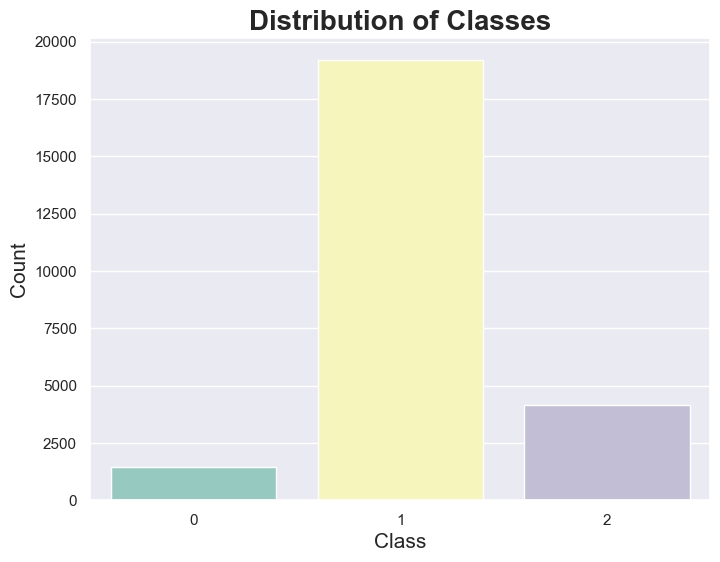

In [90]:
sns.set(style="darkgrid", palette="Set3")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='class', data=df)

plt.title('Distribution of Classes', fontsize=20, fontweight='bold')
plt.xlabel('Class', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

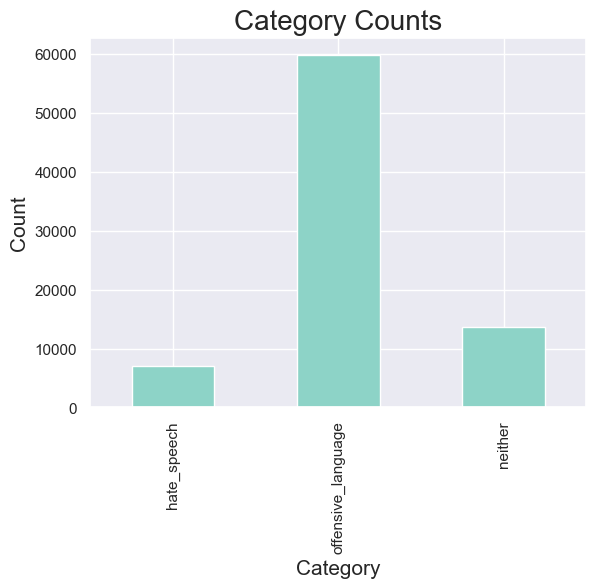

In [91]:
# Create a new DataFrame for hate speech, offensive language, and neither
hate_offensive_neither = df[['hate_speech', 'offensive_language', 'neither']]

# Calculate the sum of each category
category_counts = hate_offensive_neither.sum()

# Plot the category counts
category_counts.plot(kind='bar')
plt.title('Category Counts', fontsize=20)
plt.xlabel('Category', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

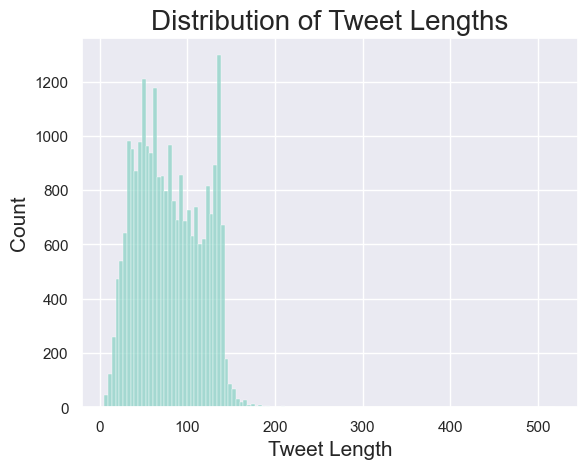

In [92]:
# Calculate the length of each tweet
df['tweet_length'] = df['tweet'].apply(len)

# Plot the distribution of tweet lengths
sns.histplot(df['tweet_length'])
plt.title('Distribution of Tweet Lengths', fontsize=20)
plt.xlabel('Tweet Length', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

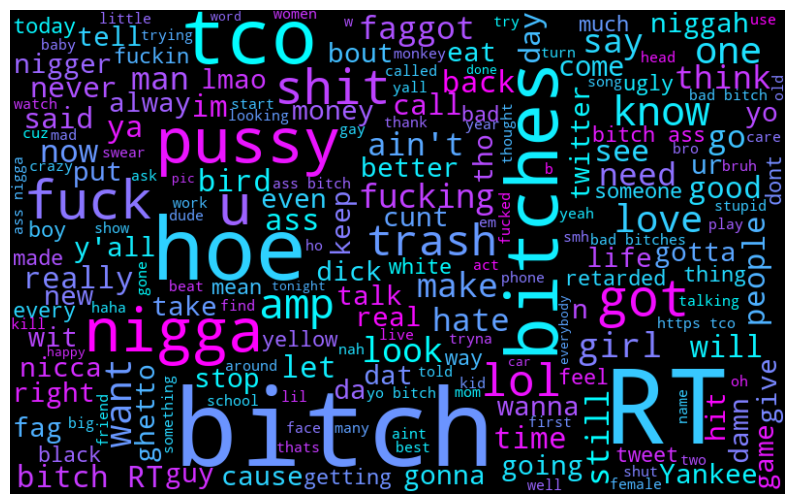

In [93]:
all_words = ' '.join([text for text in df['tweet']])

# Define the colormap
colormap = 'cool'

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, colormap=colormap).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

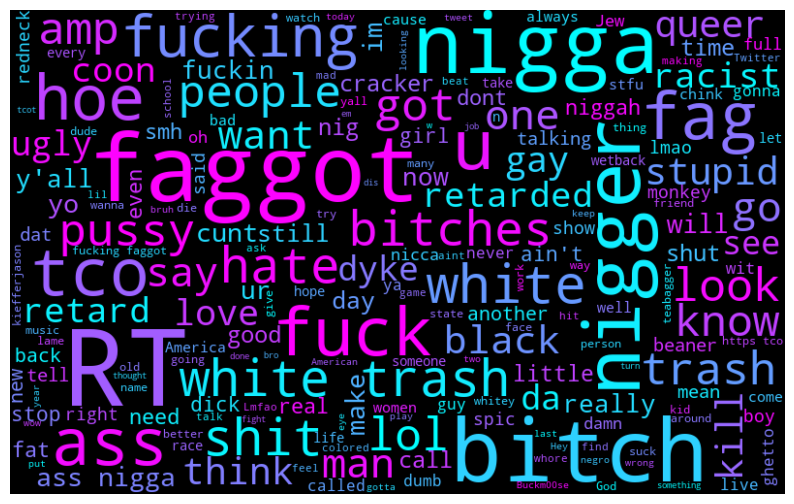

In [94]:
# Visualizing which of the word is most commonly used for hatred speech

hatred_words = ' '.join([text for text in df['tweet'][df['class'] == 0]])

# Define the colormap
colormap = 'cool'

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, colormap=colormap).generate(hatred_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

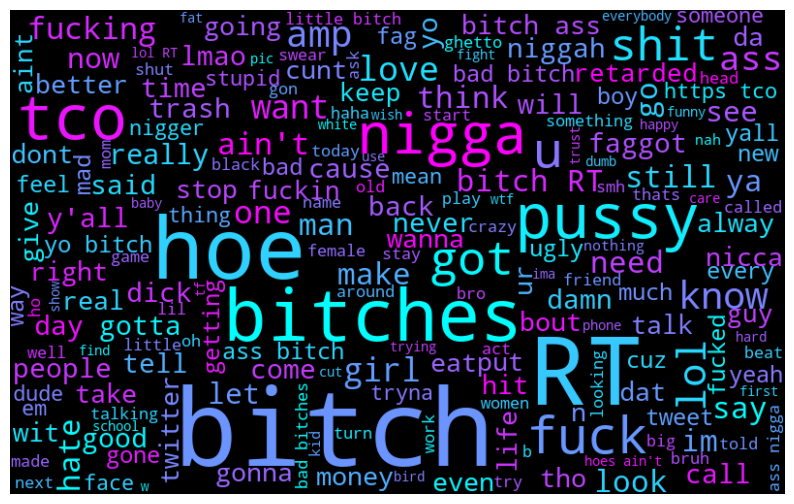

In [95]:
# Visualizing which of the word is most commonly used for offensive speech
offensive_words = ' '.join([text for text in df['tweet'][df['class'] == 1]])

# Define the colormap
color = 'cool'

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, colormap=color).generate(offensive_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [96]:
# Define a function to calculate sentiment polarity using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis function to the text column in the DataFrame
df['sentiment'] = df['tweet'].apply(get_sentiment)
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,tweet_length,sentiment
0,0,3,0,0,3,2,RT mayasolovely As a woman you shouldn't comp...,129,Neutral
1,1,3,0,3,0,1,RT mleew17 boy dats coldtyga dwn bad for cuff...,73,Negative
2,2,3,0,3,0,1,RT UrKindOfBrand Dawg RT 80sbaby4life You eve...,106,Negative
3,3,3,0,2,1,1,RT CGAnderson vivabased she look like a tranny,47,Neutral
4,4,6,0,6,0,1,RT ShenikaRoberts The shit you hear about me ...,119,Positive
...,...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthafin lie 8220LifeAsKing 20Pearls c...,125,Positive
24779,25292,3,0,1,2,2,you've gone and broke the wrong heart baby and...,69,Negative
24780,25294,3,0,3,0,1,young buck wanna eat dat nigguh like I aint fu...,63,Positive
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,37,Positive


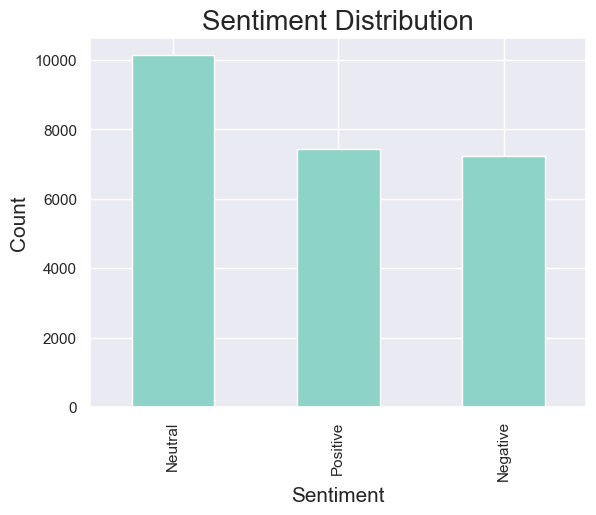

In [97]:
# Plot the sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution', fontsize=20)
plt.xlabel('Sentiment', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

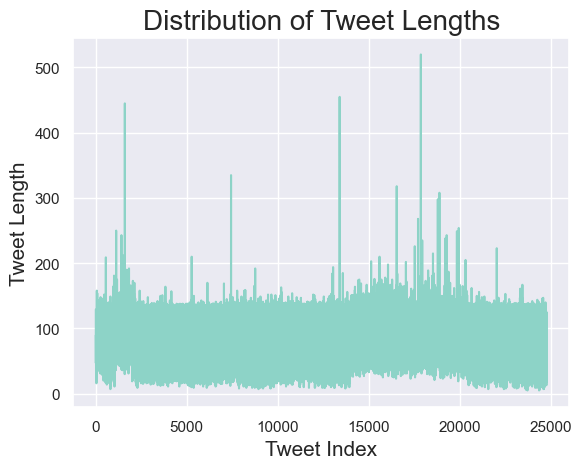

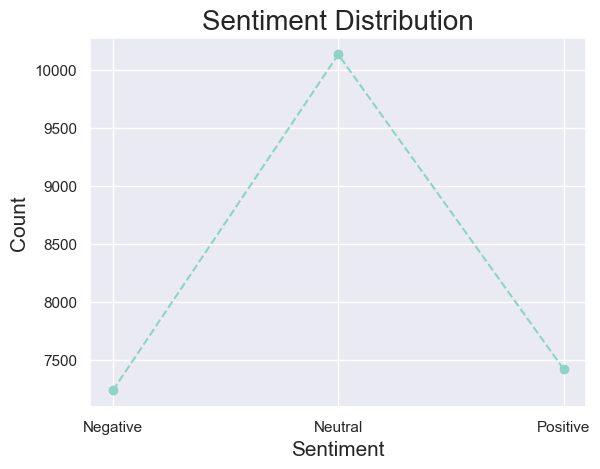

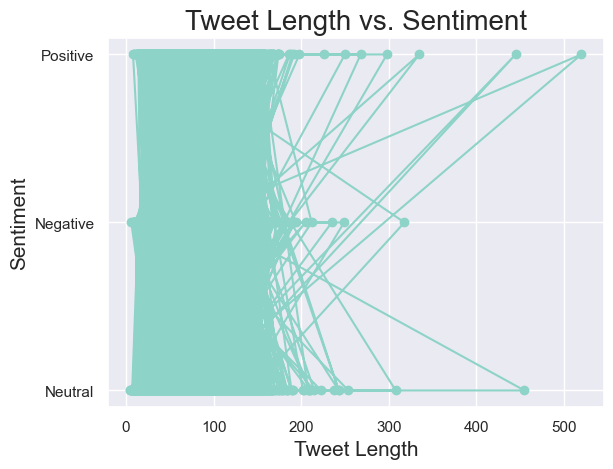

In [98]:
# Calculate the length of each tweet
df['tweet_length'] = df['tweet'].apply(len)

# Line chart for the distribution of tweet lengths
plt.plot(df['tweet_length'], color='#8dd3c7')
plt.title('Distribution of Tweet Lengths', fontsize=20)
plt.xlabel('Tweet Index', fontsize=15)
plt.ylabel('Tweet Length', fontsize=15)
plt.show()

# Line chart for the sentiment distribution
sentiment_counts = df['sentiment'].value_counts().sort_index()
plt.plot(sentiment_counts.index, sentiment_counts.values, color='#8dd3c7', marker='o', linestyle='--')
plt.title('Sentiment Distribution', fontsize=20)
plt.xlabel('Sentiment', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

# Scatter plot between tweet length and sentiment
plt.plot(df['tweet_length'], df['sentiment'], marker='o', linestyle='-', color='#8dd3c7')
plt.title('Tweet Length vs. Sentiment', fontsize=20)
plt.xlabel('Tweet Length', fontsize=15)
plt.ylabel('Sentiment', fontsize=15)
plt.show()

In [99]:
# Compute the sentiment polarity of each review
df['polarity'] = df['tweet'].apply(lambda x: [TextBlob(word).sentiment.polarity for word in x.split()])

# Classify the sentiment as positive, negative or neutral
df['sentiment'] = df['polarity'].apply(lambda x: sum(x)/len(x) if len(x) >0 else 0 )

In [100]:
df.head(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,tweet_length,sentiment,polarity
0,0,3,0,0,3,2,RT mayasolovely As a woman you shouldn't comp...,129,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,3,0,3,0,1,RT mleew17 boy dats coldtyga dwn bad for cuff...,73,-0.046667,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.699999999999..."
2,2,3,0,3,0,1,RT UrKindOfBrand Dawg RT 80sbaby4life You eve...,106,-0.050000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4, 0.0,..."
3,3,3,0,2,1,1,RT CGAnderson vivabased she look like a tranny,47,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
4,4,6,0,6,0,1,RT ShenikaRoberts The shit you hear about me ...,119,0.006000,"[0.0, 0.0, 0.0, -0.2, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,5,3,1,2,0,1,TMadisonx The shit just blows meclaim you so f...,122,-0.050292,"[0.0, 0.0, -0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,6,3,0,3,0,1,BrighterDays I can not just sit up and HATE on...,90,-0.042105,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.8,..."
7,7,3,0,3,0,1,8220selfiequeenbri cause I'm tired of you big ...,84,-0.030769,"[0.0, 0.0, 0.0, -0.4, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,8,3,0,3,0,1,amp you might not get ya bitch back amp thats ...,50,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,9,3,1,2,0,1,rhythmixx hobbies include fighting Mariam\n\nb...,48,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


----------------------------------------
### <center>🧐 **Conclusion** 🧐

By analyzing those data, we can see that hate speech is very present in Twitter. 
<br>

Among those hated speech, we can compare them with the lengths of those tweets. We have seen the most words used in hate speech in Twitter and we can conclude from that that words related to sex, black and homophobia are mainly used. 
<br>

From that, it's easier to target those speech as we know what categories are the most targeted by hate speech.
<br>

According to what we saw in the graph, the lenght of tweets may not be correlated with hate speeches. We also saw that most of the tweets are considering as "neutral" sentiment. 
Knowing that, it would be interesting to track tweets accroding to their lengths even further. Creating a correlation between tweet lenght and hate speech would be very easier to reduce hate speeches in Twitter. 
By creating this relation, our dear friend, Elon Musk, could implement a tool where tweets that are longer than X characters needs to be verify by moderators because it may has more chance to be hate speech (or the opposite way according to the results). 